# 2CSSID-TP02. Régression et évaluation

---

Dans ce TP, nous allons traiter la régression binaire et logistique, ainsi que l'évaluation des deux types d'apprentissage automatiuque (classement et régression).

- **Binome 01** : Boukacem Younes
- **Binome 02** : Benouaklil Hodhaifa
- **Groupe** : Il n'y a qu'un groupe => info inutile

In [1]:
import matplotlib
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
%matplotlib inline

np.__version__, pd.__version__, matplotlib.__version__

('1.24.3', '2.0.3', '3.7.2')

In [2]:
from typing          import Tuple, List, Type
from collections.abc import Callable

## I. Réalisation des algorithmes

Dans cette partie, nous allons implémenter les fonctions de régression à partir de zéro (from scratch). 
Cela va nous permettre à comprendre COMMENT les algorithmes fonctionnent : leurs complexités (temporelles et spatiales) et leurs paramètres.
Pour ce faire, nous allons utiliser la bibliothèque **numpy** qui est utile dans les calcules surtout matricielles.

### I.1. Régression linéaire

Premièrement, nous allons implémenter les fonctions nécessaire pour la régression linéaire.

#### I.1.1. Fonction de prédiction

$$Z = zf(X, theta) = \theta_0 + \sum\limits_{j=1}^{N} \theta_j X_j = \sum\limits_{j=0}^{N} \theta_j X_j | X_0 = 1 $$

- **X[M, N]** : une matrice de M échantillons et N caractéristiques. Afin d'introduire $\theta_0$, cette matrice est augmentée par une colonne $X_0 = 1$. Supposons que cela est déjà fait. Donc, la caractéristique 0  est le biais.
- **$\theta$[N]** : un vecteur des paramètres (poids des caractéristiques).
- **Z(X, $\theta$)[M]** : un vecteur des préditions de chaque échantillon.

In [3]:
# TODO: Combinaison linéaire
def zf(X: np.ndarray, Theta: np.ndarray) -> np.ndarray:
    return Theta @ X.T

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([1. , 1.7, 2.4])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], 
                [1., 200.], 
                [1., 300.]])
Theta_t = np.array([0.3, 0.007])
zf(X_t, Theta_t)

array([1. , 1.7, 2.4])

#### I.1.2. Fonction du coût

La fonction du coût calcule l'erreur d'estimation. 
Ici, nous allons utiliser l'erreur quadratique moyenne (MSE: mean square error). 

$$J = MSE(Y, H) = \frac{1}{2M} \sum\limits_{i=1}^{M} (Y - H)^2$$

- **Y[M]** : un vecteur des sorties réelles.
- **H[M]** : un vecteur des prédictions où $H = Z(X, \theta)$.
- **MSE(Y, H)** : une valeur réelle représentant l'erreur de régression.

In [4]:
# TODO: Fonction du coût MSE
def MSE(Y: np.ndarray, H: np.ndarray) -> float:
    return 1/(2*Y.size) * ((Y - H).T @ (Y - H))

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# 0.016666666666666673
#---------------------------------------------------------------------
H_t = np.array([1., 1.7, 2.4])
Y_t = np.array([1., 2.0, 2.5])
MSE(Y_t, H_t)

0.016666666666666673

Le gradient de cette fonction est calculé comme suit (Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$) : 

$$\frac{\partial MSE}{\partial \theta_j} 
= \frac{\partial }{\partial \theta_j} \frac{1}{2M} \sum\limits_{i=1}^{M} (Y^{(i)} - H^{(i)})^2 
= \frac{1}{2M} \sum\limits_{i=1}^{M} [\frac{\partial }{\partial \theta_j} (Y^{(i)} - H^{(i)})^2]
= \frac{1}{2M} \sum\limits_{i=1}^{M} [-2 (Y^{(i)} - H^{(i)}) \frac{\partial }{\partial \theta_j} H^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j}
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}]
= \frac{1}{M} \sum\limits_{i=1}^{M} [(H^{(i)} - Y^{(i)}) \frac{\partial }{\partial \theta_j} \theta_j X_j^{(i)}]
$$

$$\frac{\partial MSE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- **X[M, N]** : une matrice de M échantillons et N caractéristiques. 
- **Y[M]** : un vecteur des sorties réelles.
- **H[M]** : un vecteur des prédictions où $H = Z(X, \theta)$.
- **dMSE(X, Y, H)[N]** : les gradients de chaque caractéristique.

In [5]:
X = np.array([[1., 100.], 
                [1., 200.], 
                [1., 300.]])
H = np.array([1., 1.7, 2.4])
Y = np.array([1., 2.0, 2.5])
# H = H[:, np.newaxis]
# Y = Y[:, np.newaxis]
A = H - Y
1/3 * ( A @ X )
# X = X
# 1/2 *((H-Y) @ X ) 

array([ -0.13333333, -30.        ])

In [6]:
# TODO: Fonction des gradients MSE
def dMSE(X: np.ndarray, Y: np.ndarray, H: np.ndarray) -> np.ndarray:
    return (1/X[:,0].size) * ( (H-Y) @ X )

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([ -0.13333333, -30.        ])
#---------------------------------------------------------------------
X_t = np.array([[1., 100.], 
                [1., 200.], 
                [1., 300.]])
H_t = np.array([1., 1.7, 2.4])
Y_t = np.array([1., 2.0, 2.5])
dMSE(X_t, Y_t, H_t)

array([ -0.13333333, -30.        ])

### I.2. Régression logistique

Ici, nous allons implémenter la régression logistique qui est basée sur la combinaison linéaire de la régression linaire.
Il suffit d'appliquer la fonction logistique sur cette combinaison afin de la transformer à une probabilité.

#### I.2.1. Fonction de prédiction

La fonction logistique est calculée comme suit :

$$\sigma(Z) = \frac{1}{1+e^{-Z}}$$

- **Z[M]** : un vecteur des sommes pondérées $Z(X, \theta)$.
- **$\sigma$(Z)[M]** : un vecteur des prédictions. 
- Normalement, cette fonction doit marcher avec un scalaire, un vecteur ou une matrice. Pour l'instant, nous nous intéressons par le cas d'un vecteur.

In [7]:
# TODO: Fonction logistique
import math
def func(zi: int):
    return 1/(1+math.exp(-zi))

def sg(Z: np.ndarray) -> np.ndarray: 
    return np.fromiter(map(func, Z), dtype=float)

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([0.26894142, 0.73105858])
#---------------------------------------------------------------------
sg(np.array([-1, 1]))

array([0.26894142, 0.73105858])

La fonction de prédiction sera :

$$H(X, \theta) = \sigma(Z(X, \theta)) $$

- **X[M, N]** : une matrice de M échantillons et N caractéristiques.
- **$\theta$[N]** : un vecteur des paramètres (poids des caractéristiques).
- **Z(X, $\theta$)[M]** : un vecteur des sommes pondérées de chaque échantillon.
- **H(X, $\theta$)[M]** : un vecteur des prédictions de chaque échantillon.

In [8]:
# TODO: Fonction de prédiction (régression logistique)
def Hf_log(X: np.ndarray, Theta: np.ndarray) -> np.ndarray:
    Z = zf(X, Theta)
    H = sg(Z)
    return H

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([0.73105858, 0.55724785, 0.14185106])
#---------------------------------------------------------------------
X_t = np.array([[1., -100.], 
                [1.,   10.], 
                [1.,  300.]])
Theta_t = np.array([0.3, -0.007])
Hf_log(X_t, Theta_t)

array([0.73105858, 0.55724785, 0.14185106])

#### I.2.2. Fonction du coût

Ici, nous allons utiliser l'entropie croisée binaire (BCE: Binary Cross Entropy Loss) comme fonction du coût.
C'est la fontion utilisée dans le cas de classement binaire.

$$BCE(Y^{(i)}, H^{(i)})
= \begin{cases}
- \log(H^{(i)}) & \text{ si } Y^{(i)} = 1\\ 
- \log(1 - H^{(i)})  & \text{ si } Y^{(i)} = 0
\end{cases}
$$
Puisque $Y^{(i)} \in \{0, 1\}$, donc : 

$$ BCE(Y^{(i)}, H^{(i)}) = - Y^{(i)} \log(H^{(i)}) - (1- Y^{(i)}) \log(1 - H^{(i)}) $$

$$J = BCE(Y, H) = \frac{-1}{M} \sum\limits_{i=1}^{M} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]$$

En pratique, on doit ajouter une petite valeur $\epsilon$ à l'argument de la fonction $\log$ afin d'éviter $\log(0)$.

- **Y[M]** : un vecteur des sorties réelles.
- **H[M]** : un vecteur des prédictions.
- **BCE(Y, H)** : une valeur réelle représentant l'erreur de classement.

In [9]:
# TODO: Fonction du coût BCE
def log(h : float):
    return math.log(h)

def BCE(Y: np.ndarray, H: np.ndarray, eps: float =1e-8) -> float:
    H_log = (np.fromiter(map(log, H + eps), dtype=float))[:,np.newaxis]
    H_log1 = (np.fromiter(map(log,(1 - H) + eps), dtype=float))[:,np.newaxis]  
    return (-1/Y.size) * ( Y @ H_log + (1-Y) @ H_log1 )

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat (sans epsilon, avec) : 
# (0.6181210324473608, 0.61812101133625)
#---------------------------------------------------------------------
Y_t = np.array([1.00, 0.00, 0.0, 1.0])
H_t = np.array([0.25, 0.25, 0.5, 0.9])
BCE(Y_t, H_t, eps=0), BCE(Y_t, H_t)

(array([0.61812103]), array([0.61812101]))

Le gradient de cette fonction est calculé comme suit : 

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{\partial}{\partial \theta_j} [Y^{(i)} \log(H^{(i)}) + (1- Y^{(i)}) \log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{\partial}{\partial \theta_j} \log(H^{(i)}) + (1- Y^{(i)}) \frac{\partial}{\partial \theta_j}\log(1 - H^{(i)})]
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} [ Y^{(i)} \frac{1}{H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)} + (1- Y^{(i)}) \frac{-1}{1-H^{(i)}} \frac{\partial}{\partial \theta_j} H^{(i)})]
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} \frac{\partial}{\partial \theta_j} H^{(i)}
$$

$$\frac{\partial H^{(i)}}{\partial \theta_j} 
= \frac{\partial \sigma(Z^{(i)})}{\partial Z^{(i)}} \frac{\partial Z^{(i)}}{\partial \theta_j} 
= [\sigma(Z^{(i)}) (1-\sigma(Z^{(i)}))]\frac{\partial}{\partial \theta_j} \sum\limits_{k=0}^{N} \theta_k X_k^{(i)}  
= H^{(i)} (1-H^{(i)})  X_j^{(i)}
$$

$$\frac{\partial BCE}{\partial \theta_j} 
= \frac{-1}{M} \sum\limits_{i=1}^{M} \frac{Y^{(i)}-H^{(i)}}{H^{(i)}(1-H^{(i)})} [H^{(i)} (1-H^{(i)}) X_j^{(i)}]
$$

$$\frac{\partial BCE}{\partial \theta_j} = \frac{1}{M} \sum\limits_{i=1}^{M} (H^{(i)} - Y^{(i)}) X_j^{(i)}$$

- 
Où $X^{(i)}$ est l'échantillon $i$ et $Y^{(i)}$ est la prédiction. $X_0^{(i)} = 1$

In [10]:
# La fonction de gradient BCE est la même que celle de MSE
# Donc, je vais l'implémenter moi-même puisque c'est facile
dBCE = dMSE

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# array([-0.08333333, -0.25      ])
#---------------------------------------------------------------------
X_t = np.array([[1.,  5.], 
                [1., 10.], 
                [1.,  8.]])
H_t = np.array([2.75, 5.25, 4.25])
Y_t = np.array([3.00, 5.00, 4.50])
dMSE(X_t, Y_t, H_t)

array([-0.08333333, -0.25      ])

### I.3. Descente du gradient 

**Rien à programmer ici**

Dans cette fonction, nous allons itérer jusqu'à arriver au nombre max des itérations (pas d'autres conditions d'arrêt).

- **X[M, N]** : une matrice de M échantillons et N caractéristiques.
- **Y[M]** : un vecteur des sorties réelles.
- **$\theta$[N]** : un vecteur des paramètres (poids des caractéristiques).


In [11]:
# La fonction de la descente du gradient
def descente(X: np.ndarray, Y: np.ndarray, Theta: np.ndarray, # arguments obligatoires
             it_max:   int = 100   , # nombre maximal des itérations
             alpha:  float = 0.01  , # taux d'apprentissage
             Hf:  Callable = Hf_log, # la fonction qui calule la sortie
             Jf:  Callable = BCE   , # la fonction du coût
             dJf: Callable = dBCE    # la fonction du gradient
            ) -> Tuple[List[np.ndarray], List[float]]: 
     
    couts  = []           # historique des coûts
    Thetas = []           # historique des thetas
    Theta  = Theta.copy() # une copie pour garder le contenu de Theta original
    
    # Ici, on boucle jusqu'à arriver aux maximum des itérations
    for it in range(it_max):
        H        = Hf (X, Theta)       # estimer la sortie
        J        = Jf (Y, H    )       # calculer le coût
        dJ       = dJf(X, Y, H )       # calculer les gradients
        Theta    = Theta - alpha * dJ  # mettre à jour Theta
        couts .append(J)               # stocker le coût courant
        Thetas.append(Theta.copy())    # stocker les Thetas courants
    
    return Thetas, couts

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : 
# (array([ 0.66487158, -0.1265281 ,  0.93802309]), 0.6851969300532375)
#---------------------------------------------------------------------

X_t = np.array([
    [1, 1, 0.2],
    [1, 2, 0.1],
    [1, 3, 0.4],
    [1, 4, 0.3]
])

Theta_t = np.array([1., 1., 1.])

Y_t = np.array([1, 0, 1, 0])

Theta_P, J_P = descente(X_t, Y_t, Theta_t)

Theta_P[-1], J_P[-1]

(array([ 0.66487158, -0.1265281 ,  0.93802309]), array([0.68519693]))

### I.4. Regrouper les fonctions 

**Rien à programmer ici**

Nous voulons créer une classe qui supporte la régression linéaire et la régression logistique.


In [12]:
# la fonction de normalisation
# X: un vecteur de M échantillons et N caractéristiques
# mean: un vecteur de N nombres qui représentent les moyennes des caractéristiques
# std: un vecteur de N nombres qui représentent les écarts types des caractéristiques
# si mean et std ne sont pas donnés, ils vont êtres calculés à partir de X
def normaliser(X, mean=None, std=None): 
    if (mean is None) or (std is None): 
        mean = np.mean(X, axis=0) 
        std  = np.std (X, axis=0)
    X_norm = np.where(std==0, X, (X - mean)/std)
    return X_norm, mean, std

def preparer(X, norm=True, const=True, mean=None, std=None): 
    X_pre = X.copy()
    if norm: 
        X_pre, mean, std = normaliser(X_pre, mean=mean, std=std)
    if const:
        X_pre = np.append(np.ones((X_pre.shape[0], 1)), X_pre, axis=1)
    return X_pre, mean, std

def generer_zeros_1(nbr):
    return np.zeros(nbr)

def generer_uns_1(nbr):
    return np.ones(nbr)

def generer_aleatoire_1(nbr):
    return np.random.rand(nbr)


class Regression(object):
    def __init__(self, alpha=.01, log=True, norm=True, const=True): 
        
        self.norm  = norm
        self.const = const
        self.alpha = alpha
        self.log   = log
        
        if log: # Régression logistique
            self.Hf  = Hf_log 
            self.Jf  = BCE
            self.dJf = dBCE
        else: # Régression linéaire
            self.Hf  = zf
            self.Jf  = MSE
            self.dJf = dMSE
        
    
    def entrainer(self, X, Y, nbr_iter=100): 
        X_pre, self.mean, self.std = preparer(X, norm=self.norm, const=self.const)
        Theta = generer_uns_1(X_pre.shape[1])# Supposons, les paramètres sont initialisés à 1
        self.Thetas, self.couts = descente(X_pre, Y, Theta, 
                                           it_max = nbr_iter, 
                                           alpha  = self.alpha, # arguments de régularisation
                                           Hf     = self.Hf, # fonction logistique
                                           Jf     = self.Jf,
                                           dJf    = self.dJf
                                          )
        
    # La prédiction
    # si classes=True elle rend un vecteur de 1 et 0
    # sinon elle rend un vecteur de probabilités
    def predire(self, X, classes=True, seuil=0.5):
        X_pre, _, _ = preparer(X, 
                               norm  = self.norm, 
                               const = self.const, 
                               mean  = self.mean, 
                               std   = self.std
                              )
        H = self.Hf(X_pre, self.Thetas[-1])
        if self.log and classes:
            return (H >= seuil).astype(int)
        return H

#=====================================================================
# TEST UNITAIRE
#=====================================================================
# Resultat : array([0.86383643, 0.5273866 , 0.96123235])
#---------------------------------------------------------------------

X_t = np.array([
    [100, 20],
    [200, 10],
    [300, 40],
    [400, 30]
])

Y_t = np.array([1, 0, 1, 0])

# logistique
reglog = Regression()
reglog.entrainer(X_t, Y_t)

reglog.Thetas[-1]

array([0.86383643, 0.5273866 , 0.96123235])

## II. Application et analyse

Cette partie sert à appliquer les algorithmes, modifier les hyper-paramètres et analyser les résultats.
Son but est de comprendre comment les hyper-paramètres peuvent affeter le fonctionnement d'un algorithme.

### II.1. Régression linéaire

Pour tester la régression linéaire, nous allons essayer d'estimer les prix des maisons en se basant sur leurs superficies.
Pour ce faire, nous allons diviser notre dataset en deux : 80% pour l'entraînement et 20% pour le test (nous avons désactivé la dividion aléatoire afin d'avoir les mêmes résultats à chaque exécution).

In [13]:
header = ['Superficie', 'Prix']
houses = pd.read_csv('data/houses.csv', names=header)
houses.head()

,Superficie,Prix
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [14]:
from sklearn.model_selection import train_test_split  

Xhouses = houses.iloc[:, :-1].values # Premières colonnes 
Yhouses = houses.iloc[:,  -1].values # Dernière colonne 

Xhouses_train, Xhouses_test, Yhouses_train, Yhouses_test = train_test_split(Xhouses, Yhouses, 
                                                                            test_size    = 0.2, 
                                                                            random_state = 0
                                                                           )  

len(Xhouses_train), len(Xhouses_test)

(37, 10)

#### II.1.1. Taux d'apprentissage et convergence 

Ici, nous avons varié le taux d'apprentissage et affiché les courbes de la fonction objective en fonction de nombre d'itérations. 
Nous voulons tester l'effet du taux d'apprentissage sur la convergence de notre modèle de régression.


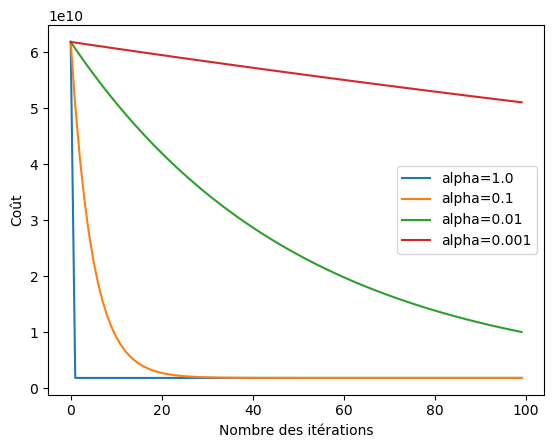

In [15]:
ITMAX  = 100
alphas = [1., 0.1, 0.01, 0.001]

# Création et entraînement des nouveaux modèles de régression linéaire
for alpha in alphas:
    # Création d'un nouveau modèle de régression linéaire
    modele = Regression(alpha=alpha, log=False)
    # Entraînement du modèle
    modele.entrainer(Xhouses_train, Yhouses_train, nbr_iter=ITMAX)
    # Visualisation de la convergence
    plt.plot(modele.couts, label = 'alpha=' + str(alpha))
    
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous ? (Il faut décrire les résultats).
- Donner une hypothèse concernant le rapport entre le taux et la vitesse de convergence.
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours.
- Pourquoi nous ne devons pas utiliser un taux égale à 1 avec seulement une itération en pratique ?
- Pourquoi nous ne devons pas utiliser un taux égale à 1 avec plusieurs itérations en pratique (quel est le risque) ?

**Réponse**

- A chaque fois qu'on augmente la valeur du taux d'apprentissage la fonction objective converge dans un plus petit nombre d'itérations (plus rapidement).
- Plus le taux est grand plus rapide sera la convergence.
- L'algorithme de descente du gradient fait que plus theta s'approche de l'optimale, plus le gradient va diminuer (tendre vers 0) ce qui ralentit la convergence, donc quand le taux d'apprentissage est grand il va compenser cette diminution du gradient d'après la formule $\theta_{n+1} = \theta_n - \alpha \nabla f(\theta_n)$
- Dans la pratique, il ne faut pas s'arrêter après seulement une itération car la fonction objective (coût) peut encore diminuer ça veut dire des meilleurs résultats. Donc l'exemple ci-dessus est juste un cas particulier où on a atteint l'optimal après une itération seulement avec le taux d'apprentissage = 1. 
- Un taux d'apprentissage trops grand peut introduire le risque de divergence de la descente du gradient. 

#### II.1.2. Qualité de prediction 

Ici, nous voulons tester la qualité de prédiction de la régression linéaire : est-ce qu'elle estime les sorties d'une manière exacte ou au moins d'une manière rapprochée. 
Pour ce faire, nous avons entraîné notre modèle sur les données d'entraînement (en bleu). 
Ensuite, nous avons essayé d'estimer les résultats de test (en vert : les sorties réelles ; en magenta : les sorties estimées).

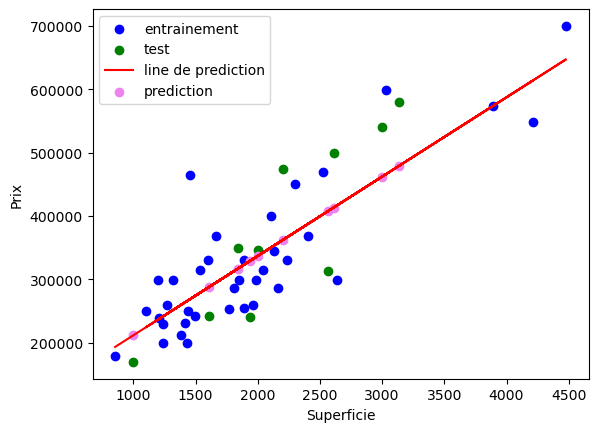

In [16]:
from sklearn.linear_model  import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline      import make_pipeline

# Entraînement d'un modèle de régression linéaire 
regresseur1 = make_pipeline(StandardScaler(with_mean=False), LinearRegression())
regresseur1.fit(Xhouses_train, Yhouses_train)

Yhouses_pred = regresseur1.predict(Xhouses_test )
Yhouses_line = regresseur1.predict(Xhouses_train)  

# Visualiser la distribution des données d'entraînement et de test
# Aussi, la ligne de prédiction et la prédiction du dataset de test
plt.scatter(Xhouses_train, Yhouses_train, color='blue'  , label = 'entrainement'      )
plt.scatter(Xhouses_test , Yhouses_test , color='green' , label = 'test'              )
plt.plot   (Xhouses_train, Yhouses_line , color='red'   , label = 'line de prediction')
plt.scatter(Xhouses_test , Yhouses_pred , color='violet', label = 'prediction'        )
plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

**TODO: Analyser les résultats**

- Est-ce que la régression linéaire peut prédire exactement les valeurs Y ?
- Pourquoi ?

**Réponse**

- Non
- La liaison entre la superficie et le prix n'est pas lineaire donc le modèle n'est qu'une approximation du prix.

#### II.1.3. Qualité de prédiction avec plus de caractéristiques

Nous voulons tester si l'utilisation de plusieurs caracétristiques peut améliorer la prédiction. 
Aussi, nous voulons tester la régression polynomiale (qui est une régression linéaire avec les interractions des aractéristiques). 
Pour ce faire, nous avons créé de nouvelles caractéristiques pour avoir une régression polynomiale : $X^5$ et $X^{10}$.

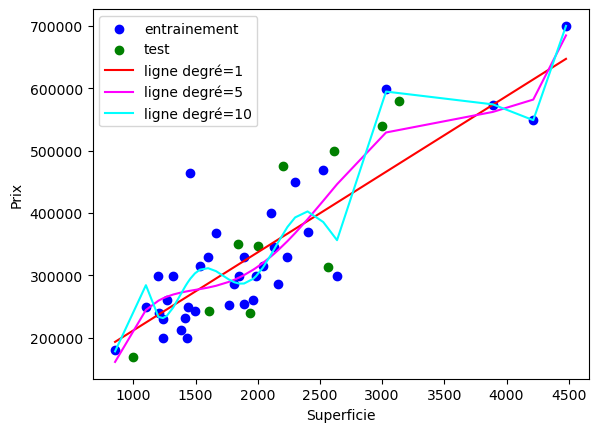

In [17]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics       import mean_squared_error
from sklearn.metrics       import mean_absolute_error

degres = [5, 10]

erreurs_labels = [1] + degres
erreurs_mse    = [        mean_squared_error(Yhouses_test, Yhouses_pred) ]
erreurs_rmse   = [np.sqrt(mean_squared_error(Yhouses_test, Yhouses_pred))]
erreurs_mae    = [        mean_absolute_error(Yhouses_test, Yhouses_pred)]

couleurs=['magenta', 'cyan']

# Ordonner le dataset en se basant sur la superficie
# Ensuite, récupérer la liste des indexes (positions ordonnées)
idx = Xhouses_train[:,0].argsort()

# Visualiser la distribution des données d'entraînement et de test
plt.scatter(Xhouses_train, Yhouses_train, color='blue' , label='entrainement')
plt.scatter(Xhouses_test , Yhouses_test , color='green', label='test'        )
# Dessiner la ligne de décision
plt.plot(Xhouses_train[idx], regresseur1.predict(Xhouses_train[idx]), color='red', label = 'ligne degré=1')

# Entraîner des modèles polynomiaux et visualiser leur convergence
for i in range(len(degres)):
    regresseur = make_pipeline(
        PolynomialFeatures(degree=degres[i], include_bias=False), 
        StandardScaler(with_mean=False),
        LinearRegression()
    )  
    regresseur.fit(Xhouses_train, Yhouses_train)  
    plt.plot(
        Xhouses_train[idx], 
        regresseur.predict(Xhouses_train)[idx], 
        color = couleurs[i],  
        label = 'ligne degré=' + str(degres[i])
    )
    Yhouses_pred = regresseur.predict(Xhouses_test)
    mse = mean_squared_error(Yhouses_test, Yhouses_pred)
    erreurs_rmse.append(np.sqrt(mse))
    erreurs_mse.append(mse)
    erreurs_mae.append(mean_absolute_error(Yhouses_test, Yhouses_pred))

plt.xlabel('Superficie')
plt.ylabel('Prix')
plt.legend()
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous ?

**Réponse**

- Visuellement on remarque que les courbes des modèles polynomiaux sembles mieux approcher le nuage de points de tests i.e. font de meilleurs prédictions avec une meilleure prédiction pour le degré 5 que le degré 10.

#### II.1.4. Métriques d'évaluation de la régression

Nous allons continuer avec l'expérimentation passée. 
En plus de notre but, nous voulons aussi comparer les différentes métriques d'évaluation.

$$MSE(Y, H) = \frac{1}{M} \sum\limits_{i=1}^{M} (Y - H)^2$$

$$RMSE(Y, H) = \sqrt{MSE(Y, H)}$$

$$MAE(Y, H) = \frac{1}{M} \sum\limits_{i=1}^{M} |Y - H|$$

In [18]:
pd.DataFrame({
    'Degré'         : erreurs_labels,
    'Erreur (MSE)'  : erreurs_mse   ,
    'Erreur (RMSE)' : erreurs_rmse  ,
    'Erreur (MAE)'  : erreurs_mae   ,
})

,Degré,Erreur (MSE),Erreur (RMSE),Erreur (MAE)
0,1,5.821821e+09,76300.858343,69100.26362
1,5,4.717470e+09,68683.844226,59658.56518
2,10,1.579423e+10,125675.108302,100288.43522


**TODO: Analyser les résultats**

- Est-ce que plus de caractéristiques peut améliorer l'estimation ? Pourquoi ?
- Est-ce que plus de caractéristiques doit améliorer l'estimation ? Pourquoi ?
- Une de ces trois métriques est robuste contre les valeurs aberrantes, laquelle ? pourquoi ?

**Réponse**

- Oui, parceque on peut introduire des caractéristiques dont la variables à prédire depend. Par exemple la localisation de la maison (une maison à Oued Smar ne coûte pas comme la même maison à Paris XD).
- Non, car on peut rajouter des caractéristiques qui n'ont aucune relation avec la variable à prédire (par exemple l'âge du proprietaire)
- MAE, car la MSE/RMSE est plus sensible aux valeurs aberrantes dans les données, puisque elle élève au carré les différences, amplifiant l'impact des erreurs importantes tandis que la MAE traite toutes les erreurs de la même manière, quelle que soit leur taille, ce qui la rend moins sensible aux valeurs aberrantes.

### II.2. Régression logistique binaire

Pour tester la régression logistique, nous allons essayer d'estimer si un étudiant est admis en se basant sur deux notes.
Bien sûr, il est admis si la moyenne des deux notes est supérieure ou égale à 10. 
Dans ce cas, la séparation entre admis et non admis est linèaire.
Les données d'entraînement et de test ont été générées automatiquement en utilisant le script joint à ce TP.

In [19]:
notes = pd.read_csv('data/notes.csv')

# Extraction des caractéristiques 
X_notes = notes.iloc[:, :-1].values # Premières colonnes 
Y_notes = notes.iloc[:,  -1].values # Dernière colonne 

notes.head()

,Note1,Note2,Admis
0,9.75,16.00,1
1,2.25,9.50,0
2,4.50,2.50,0
3,15.50,10.25,1
4,3.25,19.50,1


#### II.2.1. Normalisation et convergence 

Nous voulons tester l'effet de la normalisation sur la vitesse de convergence du modèle.
Pour ce faire, nous avons entraîné deux modèles : un sans normalisation et l'autre ave normalisation.

**Remarque** : le coût du modèle "avec normalisation" n'est pas une ligne horizontale ; il suffit de désactiver l'affichage de l'autre courbe afin de le remarquer.

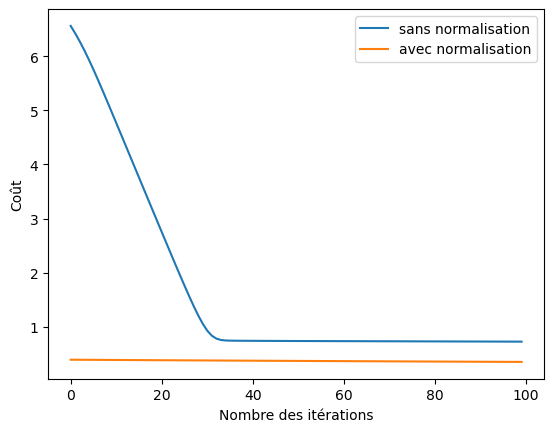

In [20]:
ALPHA = 0.01
ITMAX = 200

# Création des modèles
reg_log_nonorm = Regression(norm=False, alpha=ALPHA, log=True) # sans normalisation
reg_log_norm   = Regression(norm=True , alpha=ALPHA, log=True) # avec normalisation

# Entraînement des modèles
reg_log_nonorm.entrainer(X_notes, Y_notes)
reg_log_norm  .entrainer(X_notes, Y_notes)

# Visualisation de la convergence
plt.plot(reg_log_nonorm.couts, label = 'sans normalisation')
plt.plot(reg_log_norm.couts  , label = 'avec normalisation')
plt.xlabel('Nombre des itérations')
plt.ylabel('Coût')
plt.legend()
#plt.autoscale()
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous ?
- Donner une hypothèse (vitesse de convergence avec normalisation)
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours.

**Réponse**

- La convergence dans le cas avec normalisation est plus rapide.
- La vitesse de convergence avec normalisation est toujours meilleure que sas normalisation.
- Dans le cas ou on normalise le X, on obtient de nouvelles valeurs des $X_{ij}$ autour de zero, donc le gradient aura des composantes proches de zero $\Rightarrow$ qu'on sera plus proche du point critiques i.e de l'optimum.

#### II.2.2. Complexité du modèle et séparation

Nous voulons améliorer la séparation entre les deux classes : "admis" et "non admis". 
Pour ce faire, nous avons essayer d'utiliser des caractéristiques complexes : $X^3$ et $X^5$.

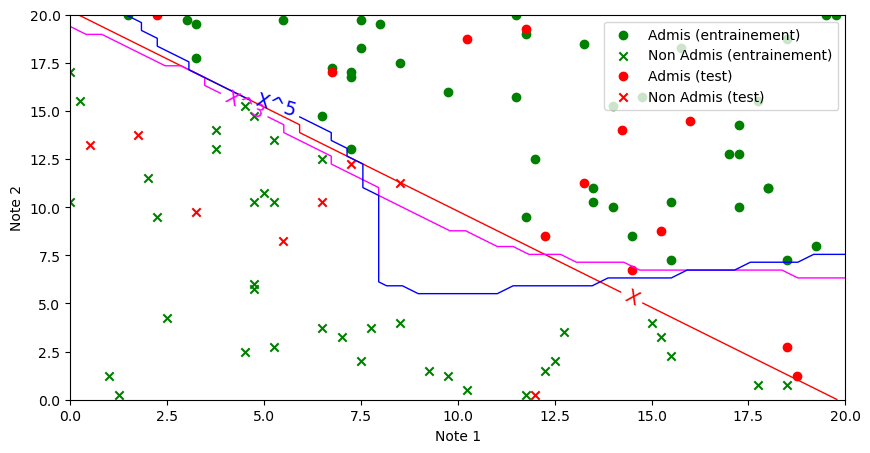

In [21]:
from sklearn.linear_model import LogisticRegression

# ce block du code est pour filtrer les avertissements concernant la convergence du modèle
# en général, lorsque e nombre des itérations n'est pas suffisant pour atteindre l'erreur minimale
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

degres = [3, 5]
couleurs=['red', 'magenta', 'blue']

# Une fonction pour dessiner le plan de séparation binaire étant donnée un modèle
# modele : c'est un modèle enttraîné pour la prédiction binaire
# ax: un objet de type matplotlib.axes.Axes; les axes sur lesquels on va dessiner
# xrange: une liste des points sur l'axe X
# yrange: une liste des points sur l'axe Y
# couleur: la couleur du dessin (de la ligne de séparation)
# label: l'étiquêtte du dessin (la ligne de séparation)
def dessiner2D(modele, ax, xrange, yrange, couleur='red', label=''):
    # Créer une matrice de (xrange X yrange): notre plan de dessin
    XX   = [[[xr, yr] for xr in xrange] for yr in yrange]
    # Représenter le sous forme d'une matrice de (xrange X yrange)/2 échantillons et 2 caractéristiques
    XX   = np.array(XX).reshape(-1, 2)
    # Prédire les probabilités (estimation) et retransformer vers notre plan (xrange X yrange)
    grid = modele.predict(XX).reshape(len(xrange), len(yrange))
    # Dessiner des lignes qui passent par les valeurs 0.5
    cs   = ax.contour(xrange, yrange, grid, colors=[couleur], linewidths=(1), linestyles=('-'),levels=[0.5])
    # Affecter l'étiquêtte à la ligne de séparation (qui es un contour dans notre cas)
    # plt.clabel(cs, inline=1, fontsize=10)
    # cs.collections[0].set_label(label)
    fmt = {cs.levels[0]: label}
    ax.clabel(cs, cs.levels, inline=True, fmt=fmt, fontsize=14)
    


X_notes_train = X_notes[:80, :]
X_notes_test  = X_notes[80:, :]
Y_notes_train = Y_notes[:80   ]
Y_notes_test  = Y_notes[80:   ]

# Trouver les indexes ordonnées 
idx2 = X_notes_train[:,0].argsort()

# Sélectionner le cas "admis" dans l'entraînement et le test
oui_train = Y_notes_train == 1
oui_test  = Y_notes_test  == 1

# Dessiner les cas "admis" et "Non admis" de l'entraînement et du test
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(X_notes_train[oui_train, 0], 
           X_notes_train[oui_train, 1], 
           color='green', marker='o', label='Admis (entrainement)')
ax.scatter(X_notes_train[~oui_train, 0], 
           X_notes_train[~oui_train, 1], 
           color='green', marker='x', label='Non Admis (entrainement)')
ax.scatter(X_notes_test[oui_test, 0], 
           X_notes_test[oui_test, 1], 
           color='red', marker='o', label='Admis (test)')
ax.scatter(X_notes_test[~oui_test, 0], 
           X_notes_test[~oui_test, 1], 
           color='red', marker='x', label='Non Admis (test)')

# Créer l'espace des notes : entre 0 et 20 avec une résolution de 50
xrange = np.linspace(0, 20, 50) # Note 1
yrange = np.linspace(0, 20, 50) # Note 2

# Dessiner la ligne de séparation dans une régression linéaire
reglog1 = LogisticRegression(penalty=None)
reglog1.fit(X_notes_train, Y_notes_train)
dessiner2D(reglog1, ax, xrange, yrange, label='X')

modeles = [reglog1]

# Dessiner la ligne de séparation dans une régression polynomiale
# Le modèle dans ce cas est un pipeline qui commence par créer des caractéristiques polynomiales
# ensuite passe le résultat vers un modèle de régression logistique
for i in range(len(degres)):
    modele = make_pipeline(PolynomialFeatures(degree=degres[i], include_bias=False),
                           LogisticRegression(penalty=None))
    modele.fit(X_notes_train, Y_notes_train)
    dessiner2D(modele, ax, xrange, yrange, couleur=couleurs[i+1], label='X^' + str(degres[i]))
    modeles.append(modele)

plt.xlabel('Note 1')
plt.ylabel('Note 2')
plt.legend(loc='upper right')
plt.show()

**TODO: Analyser les résultats**

- Que remarquez-vous (les nouveaux modèles ont-ils été capables d'améliorer le modèle initial: l'adjustement/fitting et la généralisation) ? 
- Donner une hypothèse (Quelle est la raison d'amélioration/détérioration ?) 
- Essayer de justifier cette hypothèse par ce que vous avez vu en cours.

**Réponse**

- Les nouveaux modèles ont amélioré le fitting ( la valeur optimal de la fonction coût a été réduite) par contre la généralisation s'est déteriorée comparé au modèle linéaire. 
- L'augmentation du degré conduit une amélioration du fitting et une déterioration de la généralisation.   
- En augmentant le degré on va permettre au modèle de mieux -voir trop- s'ajuster au données d'entraînement, ce qui conduit à une déterioration dans la généralisation à des données non encore vues.
 

#### II.2.3. Métriques d'évaluation du classement

Nous allons continuer la comparaison entre les trois modèles de classement.
Cette fois-ci, nous allons utiliser des métriques d'évaluation, parce que la méthode visuelle n'est pas toujours évidente surtout lorsqu'il y a plusieurs caractéristiques.
Nous allons utiliser les métriques suivants :
- Courbe ROC
- Exactitude (Accuracy)
$$Acc = \frac{TP + TN}{TP + FP + FN + TN}$$
- Précision, Rappel et F1-score
$$P = \frac{TP}{TP + FP}; R = \frac{TP}{TP + FN}; F1 = \frac{1}{\frac{1}{2}\frac{1}{P} + \frac{1}{2}\frac{1}{R}} = \frac{2 P R}{P + R}$$
- Corrélation de matthews
$$CCM = \frac{TP \times TN - FP \times FN}{\sqrt{(TP + FP) (TP + FN) (TN + FP) (TN + FN)}}$$

En plus, nous allons comparer ces trois modèles avec d'autres :
- Un modèle alèatoire
- Un modèle qui retourne toujours des 1 (classe positive)
- Un modèle qui retourne toujours des 0 (classe négative)
- Un modèle qui retourne l'inverse des sorties réelles

In [22]:

class Aleatoire:
    def predict(self, X):
        return np.random.choice([0,1], size=len(X))
    
class Pos:
    def predict(self, X):
        return np.ones(len(X))

class Neg:
    def predict(self, X):
        return np.zeros(len(X))

class Inverse:
    def predict(self, X):
        return 1 - Y_notes_test

modeles2 = modeles.copy()
modeles2.append(Aleatoire())
modeles2.append(Pos      ())
modeles2.append(Neg      ())
modeles2.append(Inverse  ())

X_t = [0, 2, 3, 5, 6]

modeles2[-4].predict(X_t), \
modeles2[-3].predict(X_t), \
modeles2[-2].predict(X_t)

(array([0, 1, 1, 0, 1]),
 array([1., 1., 1., 1., 1.]),
 array([0., 0., 0., 0., 0.]))

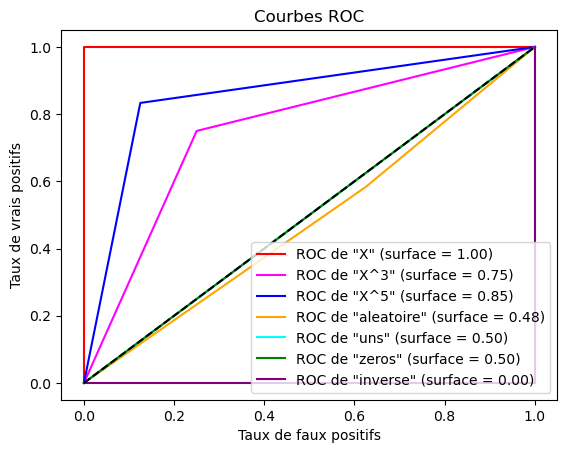

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import matthews_corrcoef

degres2 = ['X']
for degre in degres:
    degres2.append('X^' + str(degre))

degres2 =  degres2  + ['aleatoire', 'uns', 'zeros', 'inverse']
couleurs= ['red', 'magenta', 'blue', 'orange', 'cyan', 'green', 'purple']

ACCs    = []
Ps      = []
Rs      = []
F1s     = []
MCCs    = []

for degre, modele, couleur in zip(degres2, modeles2, couleurs):
    y_score     = modele.predict(X_notes_test)
    fpr, tpr, _ = roc_curve(Y_notes_test, y_score)
    roc_auc     = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=couleur, label='ROC de "{0}" (surface = {1:0.2f})'.format(degre, roc_auc))
    
    ACCs.append(accuracy_score   (Y_notes_test, y_score                 ))
    Ps  .append(precision_score  (Y_notes_test, y_score, zero_division=0))
    Rs  .append(recall_score     (Y_notes_test, y_score                 ))
    F1s .append(f1_score         (Y_notes_test, y_score                 ))
    MCCs.append(matthews_corrcoef(Y_notes_test, y_score                 ))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Taux de faux positifs')
plt.ylabel('Taux de vrais positifs')
plt.title('Courbes ROC')
plt.legend(loc='lower right')
plt.show()

**TODO: Analyser les résultats**

- Quelle est le meilleure modèle selon ROC ? Expliquer.
- Quelle est le plus mauvais modèle selon ROC ? Expliquer.

**Réponse**

- Le modèle de regression logistique linéaire ($X^1$), car il présente la plus grande AUC=1.
- Le plus mauvais modèle selon la courbe ROC sont les modèles qui retournent toujours un ou zéro, car ils ont un AUC=0.5 ie les résultats qu'ils fournissent sont complètement aléatoire. (le modèle qui "inverse" les sorties discrimine mieux la population, ils suffit juste d'inverser ses sorties pour obtenir un AUC=1)

In [24]:
pd.DataFrame({
    'Degré'         : degres2,
    'Exactitude'    : ACCs   ,
    'Précision'     : Ps     ,
    'Rappel'        : Rs     ,
    'F1 score'      : F1s    ,
    'matthews'      : MCCs   ,
})

,Degré,Exactitude,Précision,Rappel,F1 score,matthews
0,X,1.00,1.000000,1.000000,1.000000,1.000000
1,X^3,0.75,0.818182,0.750000,0.782609,0.492366
2,X^5,0.85,0.909091,0.833333,0.869565,0.697518
3,aleatoire,0.50,0.583333,0.583333,0.583333,-0.041667
4,uns,0.60,0.600000,1.000000,0.750000,0.000000
5,zeros,0.40,0.000000,0.000000,0.000000,0.000000
6,inverse,0.00,0.000000,0.000000,0.000000,-1.000000


**TODO: Analyser les résultats**

- Quelle est le modèle qui illustre l'inefficacité de l'exactitude dans le classement binaire ? Expliquer.
- Quelle est la métrique qui nous indique qu'un modèle a la capacité de faire de bonnes prédictions en inversant les classes ? Expliquer.
- "X^3" vs. "uns" : quelle est le modèle parmi les deux qui détecte plus de cas admis ? Quelle est la métrique qui assure cela ?
- "X^3" vs. "uns" : quelle est le modèle parmi les deux qui assure que les admis détectés sont vraiment admis ? Quelle est la métrique qui assure cela ?
- F1 score : pourquoi nous utilisons la moyenne harmonique entre la précision et le rappel et pas la moyenne arithmétique ? 

**Réponse**

- C'est le modèle "inverse", car son accuracy=0 alors que c'est un modèle qui sait très bien classifier (il inverse tout XD)
- La corrélation de Mathews, plus sa valeur est prôche de -1 plus on obtiendra une meilleure classification on inversant les sorties.
- "uns", la métrique qui assure ça c'eest le Rappel rappel("uns") > rappel("X^3").
- "X^3", la métrique qui assure ça c'est la précision précision("X^3") > précision("uns").
- Pour pénaliser le modèle si l'un de ces deux métriques (rappel et précision) a une valeur faible, un F1-Score est élevé si et seulement si le rappel est élevé ET la précision est élevé.